Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)

2021/11/04

<img align="left" width="50%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" >

### Read the Portal of Experimental Ocean Acidification Data
https://dataportals.pangaea.de/oa-icc/index2.php?

#### DATA SEARCH

https://wiki.pangaea.de/wiki/Main_Page

The harvested data centers are available through a large, all-containing, public, read-only Elasticsearch node; available at: http://ws.pangaea.de/es/portals/pansimple/_search?pretty

In [1]:
import json
import urllib
import pandas as pd

In [2]:
# Extract all articles (citation_date and keyword included)

url = 'http://ws.pangaea.de/es/dataportal-oa-icc/pansimple/_search?size=2000&_source_include=citation_date,keyword'

jsonurl = urllib.request.urlopen(url)
jsonread = json.loads(jsonurl.read())
jsonurl.close()

In [3]:
# Transform the resulting json to a pandas dataframe

df = pd.DataFrame.from_dict(jsonread['hits']['hits'])
df

,_index,_type,_id,_score,_source
0,portals_v2,pansimple,PANGAEA.884674,1.0,"{'citation_date': '2018-01-09', 'keyword': ['A..."
1,portals_v2,pansimple,PANGAEA.891075,1.0,"{'citation_date': '2018-06-15', 'keyword': ['A..."
2,portals_v2,pansimple,PANGAEA.885874,1.0,"{'citation_date': '2018-02-02', 'keyword': ['B..."
3,portals_v2,pansimple,PANGAEA.872024,1.0,"{'citation_date': '2016-02-14', 'keyword': ['A..."
4,portals_v2,pansimple,PANGAEA.912589,1.0,"{'citation_date': '2019-02-26', 'keyword': ['A..."
...,...,...,...,...,...
1240,portals_v2,pansimple,PANGAEA.925990,1.0,"{'citation_date': '2020-12-21', 'keyword': ['A..."
1241,portals_v2,pansimple,PANGAEA.777725,1.0,"{'citation_date': '2011-03-15', 'keyword': ['A..."
1242,portals_v2,pansimple,PANGAEA.861737,1.0,"{'citation_date': '2016-06-16', 'keyword': ['A..."
1243,portals_v2,pansimple,PANGAEA.869866,1.0,"{'citation_date': '2015-12-30', 'keyword': ['B..."


In [4]:
# Reorganize _source dictionnary as columns

# Sometimes only {} and not {'keyword: [...]'}
df['citation_date'] = df['_source'].apply(
    lambda x: eval(str(x))['citation_date'] if 'citation_date' in eval(str(x)).keys() else None)
df['keyword'] = df['_source'].apply(
    lambda x: eval(str(x))['keyword'] if 'keyword' in eval(str(x)).keys() else None)

# Force to be a list (not the case when only 1 keyword)
df['keyword'] = df['keyword'].apply(lambda x: [x] if type(x) is not list else x)

In [5]:
# Drop unused columns

df.drop(['_score','_type','_index','_source'], axis=1, inplace=True)
df.sort_values(by=['citation_date'])

,_id,citation_date,keyword
317,PANGAEA.755149,1967-12-13,"[Calcification/Dissolution, Coast and continen..."
556,PANGAEA.717620,1992-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
554,PANGAEA.717621,1994-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
957,PANGAEA.721926,1995-03-01,"[Benthos, Calcification/Dissolution, Coast and..."
13,PANGAEA.716842,1995-05-30,"[Benthos, Calcification/Dissolution, Coast and..."
...,...,...,...
583,PANGAEA.936683,2021-10-05,"[Animalia, Antarctic, Benthic animals, Benthos..."
1186,PANGAEA.937216,2021-10-12,"[Benthos, Calcification/Dissolution, Coast and..."
1169,PANGAEA.937391,2021-10-15,"[Animalia, Benthic animals, Benthos, Bottles o..."
1232,PANGAEA.937477,2021-10-20,"[Animalia, Benthic animals, Benthos, Calcifica..."


In [6]:
df[df['_id'] == 'PANGAEA.869837']

,_id,citation_date,keyword


In [7]:
# Extract all keywords

allKeywordsDB = sorted(df['keyword'].apply(pd.Series).stack().unique())
print(len(allKeywordsDB))
allKeywordsDB

1131


['Abatus cavernosus',
 'Abra alba',
 'Abra nitida',
 'Abra prismatica',
 'Abra tenuis',
 'Acanthaster planci',
 'Acanthochromis polyacanthus',
 'Acanthopagrus schlegelii',
 'Acanthophora spicifera',
 'Acartia bifilosa',
 'Acartia clausi',
 'Acartia grani',
 'Acartia hudsonica',
 'Acartia sp.',
 'Acartia tonsa',
 'Acetabularia acetabulum',
 'Acid-base regulation',
 'Acinetospora crinita',
 'Acipenser baerii',
 'Acropora cerealis',
 'Acropora cervicornis',
 'Acropora digitifera',
 'Acropora eurystoma',
 'Acropora formosa',
 'Acropora horrida',
 'Acropora hyacinthus',
 'Acropora intermedia',
 'Acropora millepora',
 'Acropora muricata',
 'Acropora palmata',
 'Acropora pulchra',
 'Acropora sp.',
 'Acropora spicifera',
 'Acropora tenuis',
 'Acropora verweyi',
 'Acropora yongei',
 'Acrosorium ciliolatum',
 'Acteon tornatilis',
 'Adamussium colbecki',
 'Adelosina longirostra',
 'Affinetrina gualtieriana',
 'Agardhiella subulata',
 'Agaricia agaricites',
 'Aglaothamnion byssoides',
 'Aiptasia p

In [8]:
# Example of a selection on a date range

s = df[df['citation_date'].between('2016-01-01', '2016-02-31')]
print(len(s))
s.sort_values(by=['citation_date'])

12


,_id,citation_date,keyword
109,PANGAEA.870407,2016-01-04,"[Animalia, Antarctic, Arthropoda, Behaviour, B..."
765,PANGAEA.870468,2016-01-09,"[Animalia, Arctic, Behaviour, Boreogadus saida..."
484,PANGAEA.870707,2016-01-12,"[Benthos, Biomass/Abundance/Elemental composit..."
911,PANGAEA.870757,2016-01-13,"[Animalia, Benthic animals, Benthos, Brackish ..."
130,PANGAEA.870756,2016-01-29,"[Arctic, Benthos, Bottles or small containers/..."
525,PANGAEA.871938,2016-02-10,"[Acid-base regulation, Animalia, Arthropoda, B..."
3,PANGAEA.872024,2016-02-14,"[Animalia, Bottles or small containers/Aquaria..."
60,PANGAEA.872313,2016-02-17,"[Animalia, Benthic animals, Benthos, Brackish ..."
579,PANGAEA.872397,2016-02-20,"[Animalia, Atherina presbyter, Behaviour, Chor..."
572,PANGAEA.872533,2016-02-22,"[Baltic Sea, Benthos, Biomass/Abundance/Elemen..."


In [9]:
# Read the CSV file that defines category/keyword relation

df1 = pd.read_csv('OA-ICC_keywords_current.csv')
df1

,Category,Keywords
0,Geographical location,Antarctic
1,Geographical location,Arctic
2,Geographical location,Baltic Sea
3,Geographical location,Indian Ocean
4,Geographical location,Mediterranean Sea
...,...,...
1125,Type of community,Rocky-shore community
1126,Type of community,Soft-bottom community
1127,Type of study,Field experiment
1128,Type of study,Field observation


In [10]:
# Aggregate keywords by category

dfCategory = df1.groupby('Category').aggregate(lambda x: sorted(set(x)))
dfCategory

,Keywords
Category,
Geographical location,"[Antarctic, Arctic, Baltic Sea, Indian Ocean, ..."
Incubation type,"[Bottles or small containers/Aquaria (<20 L), ..."
Latitudinal location,"[Polar, Temperate, Tropical]"
Living compartment,"[Benthos, Pelagos]"
Marine habitat,"[Brackish waters, Coast and continental shelf,..."
Multiple stressors,"[Inorganic toxins, Light, Macro-nutrients, Mic..."
OA Natural analog,"[CO2 vent, Estuary, Upwelling]"
Studied parameter or process,"[Acid-base regulation, Behaviour, Biomass/Abun..."
Study focus,"[Entire community, Single species, Species int..."


In [11]:
# Define a python dictionnary for each category

dictCategory = dfCategory.to_dict(orient='dict')['Keywords']
dictCategory

{'Geographical location': ['Antarctic',
  'Arctic',
  'Baltic Sea',
  'Indian Ocean',
  'Mediterranean Sea',
  'North Atlantic',
  'North Pacific',
  'Not applicable',
  'Red Sea',
  'South Atlantic',
  'South Pacific'],
 'Incubation type': ['Bottles or small containers/Aquaria (<20 L)',
  'Containers and aquaria (20-1000 L or < 1 m**2)',
  'Mesocosm or benthocosm'],
 'Latitudinal location': ['Polar', 'Temperate', 'Tropical'],
 'Living compartment': ['Benthos', 'Pelagos'],
 'Marine habitat': ['Brackish waters',
  'Coast and continental shelf',
  'Deep-sea',
  'Laboratory strains',
  'Open ocean'],
 'Multiple stressors': ['Inorganic toxins',
  'Light',
  'Macro-nutrients',
  'Micro-nutrients',
  'Organic toxins',
  'Other',
  'Oxygen',
  'Salinity',
  'Temperature'],
 'OA Natural analog': ['CO2 vent', 'Estuary', 'Upwelling'],
 'Studied parameter or process': ['Acid-base regulation',
  'Behaviour',
  'Biomass/Abundance/Elemental composition',
  'Calcification/Dissolution',
  'Community c

In [12]:
# Extract all keywords from the OA-ICC_keywords_current.csv

allKeywords = dfCategory['Keywords'].apply(pd.Series).stack().unique()
print(len(allKeywords))
allKeywords

1130


array(['Antarctic', 'Arctic', 'Baltic Sea', ..., 'Field experiment',
       'Field observation', 'Laboratory experiment'], dtype=object)

In [13]:
# Numbers of effective keywords used from the different category keywords

for category in sorted(dictCategory.keys()):
    searchedKeywords = dfCategory[dfCategory.index == category]['Keywords'][0]
    df[category] = df['keyword'].apply(lambda x: list(set(x) & set(searchedKeywords)) if x != None else [])
    z = df[category].apply(pd.Series).stack()
    print("=================================================================")
    print("%04d/%04d %s" % (len(z.unique()), len(searchedKeywords), category))
    print(z.unique())
    diff = set(searchedKeywords) - set(z)
    if len(diff) != 0:
        print('\n-----> Never used:', list(diff)[0:10])
    print()

0011/0011 Geographical location
['North Atlantic' 'South Pacific' 'Not applicable' 'North Pacific'
 'Baltic Sea' 'Mediterranean Sea' 'Arctic' 'Antarctic' 'Red Sea'
 'Indian Ocean' 'South Atlantic']

0003/0003 Incubation type
['Bottles or small containers/Aquaria (<20 L)' 'Mesocosm or benthocosm'
 'Containers and aquaria (20-1000 L or < 1 m**2)']

0003/0003 Latitudinal location
['Temperate' 'Tropical' 'Polar']

0002/0002 Living compartment
['Pelagos' 'Benthos']

0005/0005 Marine habitat
['Coast and continental shelf' 'Brackish waters' 'Laboratory strains'
 'Open ocean' 'Deep-sea']

0009/0009 Multiple stressors
['Temperature' 'Other' 'Oxygen' 'Macro-nutrients' 'Light' 'Salinity'
 'Micro-nutrients' 'Inorganic toxins' 'Organic toxins']

0003/0003 OA Natural analog
['CO2 vent' 'Estuary' 'Upwelling']

0015/0015 Studied parameter or process
['Behaviour' 'Other studied parameter or process' 'Mortality/Survival'
 'Biomass/Abundance/Elemental composition' 'Reproduction' 'Development'
 'Growth/Mo

In [14]:
# Example of keywords category 

print(dictCategory['Geographical location'])

['Antarctic', 'Arctic', 'Baltic Sea', 'Indian Ocean', 'Mediterranean Sea', 'North Atlantic', 'North Pacific', 'Not applicable', 'Red Sea', 'South Atlantic', 'South Pacific']


In [15]:
# Find different keywords or all keywords, combined with date ranges (before 2015 and after)

#selection = ['North Pacific', 'South Pacific']
#selection = ['Mediterranean Sea']
selection = dictCategory['Geographical location']    # all keywords

s_total = df[df['Geographical location'].apply(lambda x: bool(set(x) & set(selection)))]
s_period1 = s_total[s_total['citation_date'].between('1950-01-01', '2014-12-31')]
s_period2 = s_total[s_total['citation_date'].between('2015-01-01', '2030-12-31')]

print('Total: ', len(s_total))
print('< 2015', len(s_period1))
print('>=  2015', len(s_period2))

s_period2.sort_values(by=['citation_date'])

Total:  1245
< 2015 547
>=  2015 698


,_id,citation_date,keyword,Geographical location,Incubation type,Latitudinal location,Living compartment,Marine habitat,Multiple stressors,OA Natural analog,Studied parameter or process,Study focus,Targeted group,Targeted kingdom,Targeted phylum,Targeted species,Type of community,Type of study
295,PANGAEA.849401,2015-01-29,"[Alaria esculenta, Arctic, Benthos, Biomass/Ab...",[Arctic],[Bottles or small containers/Aquaria (<20 L)],[Polar],[Benthos],[Coast and continental shelf],[],[],"[Biomass/Abundance/Elemental composition, Resp...",[Single species],[Macroalgae],[Chromista],[Ochrophyta],"[Desmarestia aculeata, Alaria esculenta]",[],[Laboratory experiment]
670,PANGAEA.872395,2015-02-20,"[Animalia, Behaviour, Benthic animals, Benthos...",[North Pacific],[Containers and aquaria (20-1000 L or < 1 m**2)],[Temperate],[Benthos],[Brackish waters],[Oxygen],[],"[Behaviour, Growth/Morphology]",[Single species],[Benthic animals],[Animalia],[Mollusca],[Mytilus coruscus],[],[Laboratory experiment]
588,PANGAEA.843600,2015-03-05,"[Bottles or small containers/Aquaria (<20 L), ...",[Not applicable],[Bottles or small containers/Aquaria (<20 L)],[],[Pelagos],[Laboratory strains],[Light],[],"[Primary production/Photosynthesis, Calcificat...",[Single species],[Phytoplankton],[Chromista],[Haptophyta],[Emiliania huxleyi],[],[Laboratory experiment]
980,PANGAEA.859062,2015-03-22,"[Benthos, Biomass/Abundance/Elemental composit...",[South Pacific],[Bottles or small containers/Aquaria (<20 L)],[Tropical],[Benthos],[Coast and continental shelf],[],[],"[Biomass/Abundance/Elemental composition, Grow...",[Single species],[Seagrass],[Plantae],"[Tracheophyta, Charophyta]","[Cymodocea serrulata, Halodule uninervis, Thal...",[],[Laboratory experiment]
103,PANGAEA.859078,2015-03-23,"[Amphimonhystera sp., Benthos, Biomass/Abundan...",[North Atlantic],[Bottles or small containers/Aquaria (<20 L)],[Temperate],[Benthos],[Coast and continental shelf],[Temperature],[],"[Biomass/Abundance/Elemental composition, Comm...",[Entire community],[],[],[],[Amphimonhystera sp.],[Rocky-shore community],[Laboratory experiment]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,PANGAEA.936683,2021-10-05,"[Animalia, Antarctic, Benthic animals, Benthos...",[Antarctic],[Containers and aquaria (20-1000 L or < 1 m**2)],[Polar],[Benthos],[Coast and continental shelf],[],[],"[Gene expression (incl. proteomics), Other met...",[Single species],[Benthic animals],[Animalia],[Cnidaria],[Malacobelemnon daytoni],[],[Laboratory experiment]
1186,PANGAEA.937216,2021-10-12,"[Benthos, Calcification/Dissolution, Coast and...",[South Atlantic],[Containers and aquaria (20-1000 L or < 1 m**2)],[Temperate],[Benthos],[Coast and continental shelf],[],[],"[Primary production/Photosynthesis, Calcificat...",[Single species],[Macroalgae],[Plantae],[Rhodophyta],"[Lithothamnion crispatum, Melyvonnea erubescen...",[],[Laboratory experiment]
1169,PANGAEA.937391,2021-10-15,"[Animalia, Benthic animals, Benthos, Bottles o...",[North Pacific],[Bottles or small containers/Aquaria (<20 L)],[Temperate],[Benthos],[Coast and continental shelf],[],[],[Gene expression (incl. proteomics)],[Single species],[Benthic animals],[Animalia],[Mollusca],[Crassostrea gigas],[],[Laboratory experiment]
1232,PANGAEA.937477,2021-10-20,"[Animalia, Benthic animals, Benthos, Calcifica...",[North Atlantic],[Containers and aquaria (20-1000 L or < 1 m**2)],[Temperate],[Benthos],[Coast and continental shelf],[],[],"[Mortality/Survival, Calcification/Dissolution...",[Single species],[Benthic animals],[Animalia],[Mollusca],[Chamelea gallina],[],[Laboratory experiment]


In [16]:
# Example of an inversing boolean mask (here all articles that does not have a living compartment keyword)

selection = ['Pelagos','Benthos']
s = df[~df['Living compartment'].apply(lambda x: bool(set(x) & set(selection)))]
print(len(s))
s.sort_values(by=['citation_date'])

14


,_id,citation_date,keyword,Geographical location,Incubation type,Latitudinal location,Living compartment,Marine habitat,Multiple stressors,OA Natural analog,Studied parameter or process,Study focus,Targeted group,Targeted kingdom,Targeted phylum,Targeted species,Type of community,Type of study
544,PANGAEA.756663,2010-08-19,"[Animalia, Benthic animals, Bottles or small c...",[North Atlantic],[Bottles or small containers/Aquaria (<20 L)],[Temperate],[],[Coast and continental shelf],[],[],"[Other metabolic rates, Respiration, Growth/Mo...",[Single species],[Benthic animals],[Animalia],[Mollusca],[Mytilus edulis],[],[Laboratory experiment]
876,PANGAEA.767576,2011-08-31,"[Antarctic, Emiliania huxleyi, Indian Ocean, N...","[North Pacific, Indian Ocean, South Atlantic, ...",[],[],[],[],[],[],[],[],[Phytoplankton],[],[],[Emiliania huxleyi],[],[]
171,PANGAEA.826461,2012-01-21,"[Laboratory experiment, Laboratory strains, Li...",[North Pacific],[],[],[],[Laboratory strains],[Light],[],[Respiration],[],[Phytoplankton],[],[Ochrophyta],[Thalassiosira pseudonana],[],[Laboratory experiment]
29,PANGAEA.823110,2012-11-21,"[Bottles or small containers/Aquaria (<20 L), ...",[North Pacific],[Bottles or small containers/Aquaria (<20 L)],[],[],[Laboratory strains],[Macro-nutrients],[],"[Primary production/Photosynthesis, Respiratio...",[Single species],[Phytoplankton],[Chromista],[Ochrophyta],[Phaeodactylum tricornutum],[],[Laboratory experiment]
560,PANGAEA.829084,2013-02-10,"[Nodularia spumigena, Not applicable]",[Not applicable],[],[],[],[],[],[],[],[],[],[],[],[Nodularia spumigena],[],[]
261,PANGAEA.830817,2013-03-21,"[Calcification/Dissolution, Laboratory experim...",[Not applicable],[],[],[],[Laboratory strains],[Micro-nutrients],[],[Calcification/Dissolution],[],[],[],[],[Stylophora pistillata],[],[Laboratory experiment]
180,PANGAEA.901387,2018-05-13,"[Alexandrium tamarense, Animalia, Behaviour, B...",[Not applicable],[Bottles or small containers/Aquaria (<20 L)],[],[],[Laboratory strains],[Macro-nutrients],[],"[Other metabolic rates, Behaviour, Other studi...","[Species interaction, Single species]","[Phytoplankton, Nekton]","[Animalia, Chromista]",[],"[Danio rerio, Alexandrium tamarense]",[],[Laboratory experiment]
783,PANGAEA.901388,2018-05-13,"[Biomass/Abundance/Elemental composition, Bott...",[Not applicable],[Bottles or small containers/Aquaria (<20 L)],[],[],[],[Macro-nutrients],[],"[Biomass/Abundance/Elemental composition, Grow...",[Single species],[Phytoplankton],[Chromista],[Haptophyta],[Emiliania huxleyi],[],[Laboratory experiment]
964,PANGAEA.918952,2018-06-15,"[Biomass/Abundance/Elemental composition, Bott...",[Not applicable],[Bottles or small containers/Aquaria (<20 L)],[],[],[Laboratory strains],[],[],"[Biomass/Abundance/Elemental composition, Grow...",[Single species],[Phytoplankton],[Chromista],[Haptophyta],[Gephyrocapsa oceanica],[],[Laboratory experiment]
450,PANGAEA.916160,2019-05-12,"[Bottles or small containers/Aquaria (<20 L), ...",[Not applicable],[Bottles or small containers/Aquaria (<20 L)],[],[],[Laboratory strains],[],[],"[Primary production/Photosynthesis, Growth/Mor...",[Single species],[Phytoplankton],[Plantae],[Chlorophyta],[Chlorella sp.],[],[Laboratory experiment]


In [21]:
dhisto = pd.DataFrame()

year = 2015
list1 = ['Targeted phylum', 'Study focus', 'Studied parameter or process', 'Multiple stressors']

for l in list1:
    selection = dictCategory[l]
    s_total = df[df[l].apply(lambda x: bool(set(x) & set(selection)))]
    s_period1 = s_total[s_total['citation_date'].between('1950-01-01', str(year-1)+'-12-31')]
    s_period2 = s_total[s_total['citation_date'].between(str(year)+'-01-01', '2030-12-31')]
    
    dhisto = dhisto.append({'name': l, 
                            'before ' + str(year): 100 * len(s_period1)/len(s_total), 
                            'after ' + str(year):  100 * len(s_period2)/len(s_total)}, 
                           ignore_index=True)

dhisto.set_index('name', inplace=True)
dhisto

,before 2015,after 2015
name,,
Targeted phylum,43.762183,56.237817
Study focus,43.744956,56.255044
Studied parameter or process,43.886640,56.113360
Multiple stressors,35.355649,64.644351


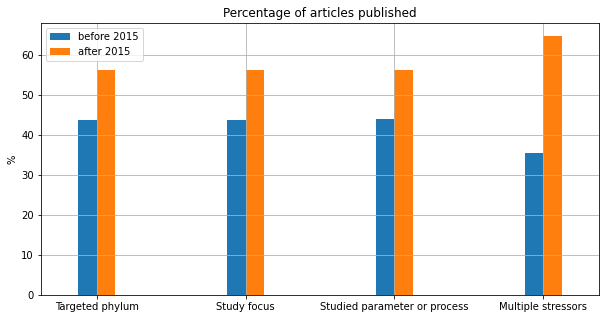

In [22]:
p = dhisto.plot.bar(title="Percentage of articles published", 
                xlabel="", ylabel="%",
                rot=0, grid=True, figsize=[10,5], width=0.25)

In [23]:
#df[df['Geographical location'].apply(lambda x: bool(set(x) & set(["North Pacific"])))]
#df[df['Geographical location'].apply(lambda x: bool(set(x) & set(["Not applicable"])))]
a = df[df['Geographical location'].apply(lambda x: len(set(x)) == 0)]
a

,_id,citation_date,keyword,Geographical location,Incubation type,Latitudinal location,Living compartment,Marine habitat,Multiple stressors,OA Natural analog,Studied parameter or process,Study focus,Targeted group,Targeted kingdom,Targeted phylum,Targeted species,Type of community,Type of study


In [24]:
a.to_csv('Geographical_location_empty.csv', index=False)

In [25]:
# print(dictCategory['Targeted group'])
print(dictCategory['Geographical location'])

['Antarctic', 'Arctic', 'Baltic Sea', 'Indian Ocean', 'Mediterranean Sea', 'North Atlantic', 'North Pacific', 'Not applicable', 'Red Sea', 'South Atlantic', 'South Pacific']


In [26]:
import matplotlib.pyplot as plt

### Histogram with Before and After

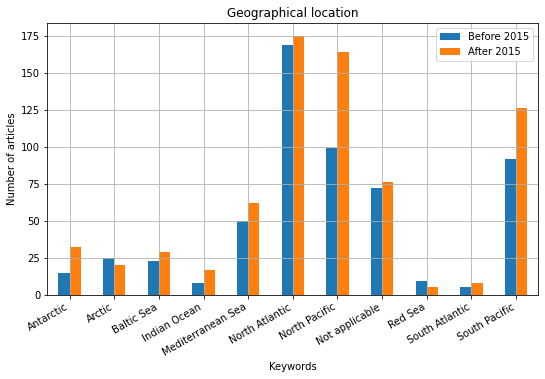

In [27]:
year = 2015

# All categories except
categories = df.columns
categories = categories.drop(['_id', 'citation_date', 'keyword', 'Targeted species'])

for category in ['Geographical location'] :
#for category in categories :

    dhisto = pd.DataFrame()
    
    listKeywords = dictCategory[category]

    for k in listKeywords:
        s_total = df[df[category].apply(lambda x: bool(set(x) & set([k])))]
        s_period1 = s_total[s_total['citation_date'].between('1950-01-01', str(year-1)+'-12-31')]
        s_period2 = s_total[s_total['citation_date'].between(str(year)+'-01-01', '2030-12-31')]
    
        dhisto = dhisto.append({ 'name': k, 
                             'Before ' + str(year): len(s_period1), 
                             'After ' + str(year):  len(s_period2) }, 
                           ignore_index=True)

    dhisto.set_index('name', inplace=True)

    p = dhisto.plot.bar(title=category, 
                xlabel="Keywords", ylabel="Number of articles",
                grid=True, figsize=[0.8*len(listKeywords) ,5], width=0.5)
    plt.xticks(rotation=30, horizontalalignment='right')
    plt.savefig(category.replace(' ', '_') + '_1.png', 
                facecolor="white", transparent=False, bbox_inches="tight")
    plt.show()
    

### Histogram with Total and Before

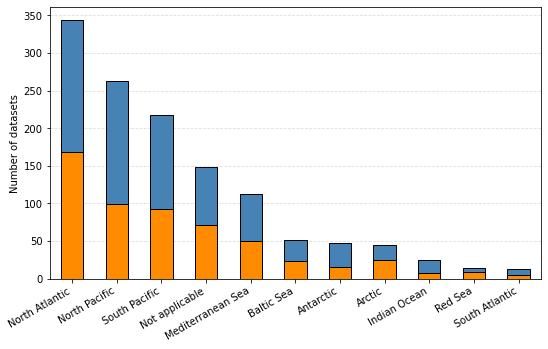

                   Before 2015  After 2015  Total
name                                             
North Atlantic           169.0       175.0  344.0
North Pacific             99.0       164.0  263.0
South Pacific             92.0       126.0  218.0
Not applicable            72.0        76.0  148.0
Mediterranean Sea         50.0        62.0  112.0
Baltic Sea                23.0        29.0   52.0
Antarctic                 15.0        32.0   47.0
Arctic                    25.0        20.0   45.0
Indian Ocean               8.0        17.0   25.0
Red Sea                    9.0         5.0   14.0
South Atlantic             5.0         8.0   13.0


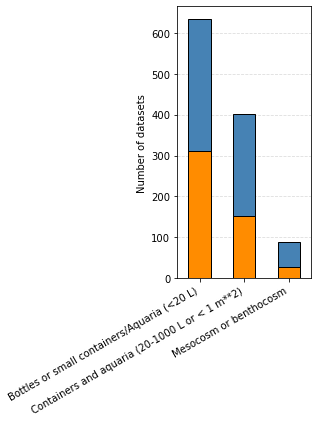

                                                Before 2015  After 2015  Total
name                                                                          
Bottles or small containers/Aquaria (<20 L)           311.0       322.0  633.0
Containers and aquaria (20-1000 L or < 1 m**2)        151.0       251.0  402.0
Mesocosm or benthocosm                                 28.0        60.0   88.0


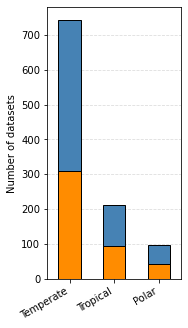

           Before 2015  After 2015  Total
name                                     
Temperate        309.0       434.0  743.0
Tropical          95.0       117.0  212.0
Polar             42.0        56.0   98.0


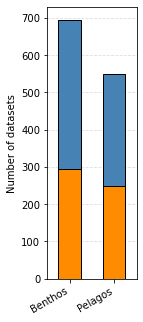

         Before 2015  After 2015  Total
name                                   
Benthos        294.0       401.0  695.0
Pelagos        250.0       299.0  549.0


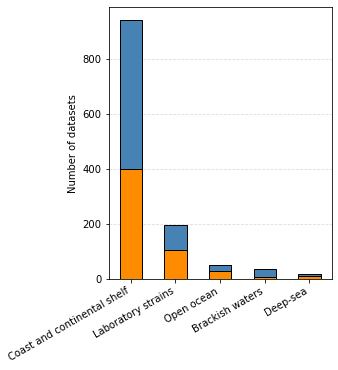

                             Before 2015  After 2015  Total
name                                                       
Coast and continental shelf        397.0       544.0  941.0
Laboratory strains                 104.0        91.0  195.0
Open ocean                          29.0        19.0   48.0
Brackish waters                      5.0        31.0   36.0
Deep-sea                            10.0         7.0   17.0


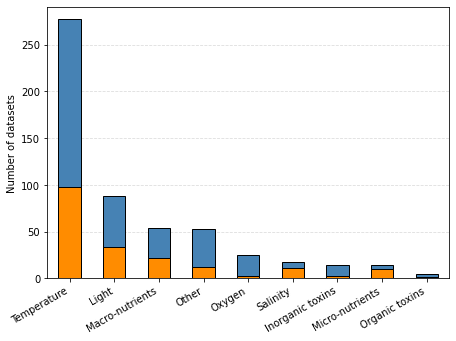

                  Before 2015  After 2015  Total
name                                            
Temperature              98.0       179.0  277.0
Light                    33.0        55.0   88.0
Macro-nutrients          22.0        32.0   54.0
Other                    12.0        41.0   53.0
Oxygen                    2.0        23.0   25.0
Salinity                 11.0         7.0   18.0
Inorganic toxins          2.0        12.0   14.0
Micro-nutrients          10.0         4.0   14.0
Organic toxins            1.0         4.0    5.0


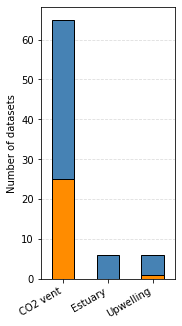

           Before 2015  After 2015  Total
name                                     
CO2 vent          25.0        40.0   65.0
Estuary            0.0         6.0    6.0
Upwelling          1.0         5.0    6.0


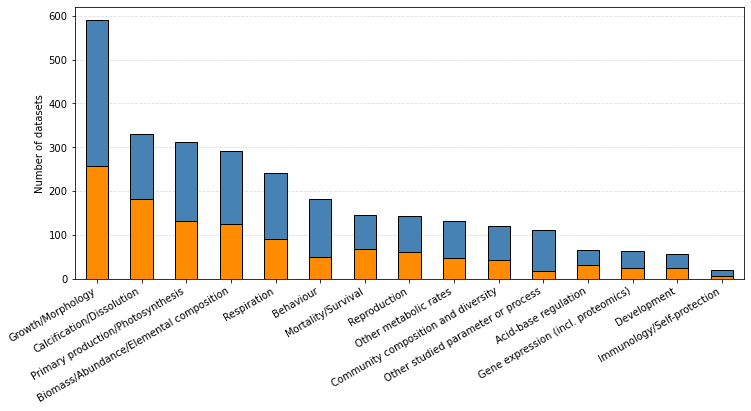

                                         Before 2015  After 2015  Total
name                                                                   
Growth/Morphology                              257.0       334.0  591.0
Calcification/Dissolution                      181.0       150.0  331.0
Primary production/Photosynthesis              132.0       180.0  312.0
Biomass/Abundance/Elemental composition        124.0       168.0  292.0
Respiration                                     90.0       152.0  242.0
Behaviour                                       50.0       131.0  181.0
Mortality/Survival                              67.0        78.0  145.0
Reproduction                                    60.0        83.0  143.0
Other metabolic rates                           47.0        85.0  132.0
Community composition and diversity             42.0        77.0  119.0
Other studied parameter or process              18.0        92.0  110.0
Acid-base regulation                            31.0        35.0

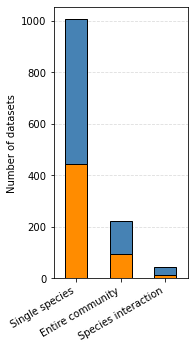

                     Before 2015  After 2015   Total
name                                                
Single species             443.0       561.0  1004.0
Entire community            96.0       125.0   221.0
Species interaction         12.0        32.0    44.0


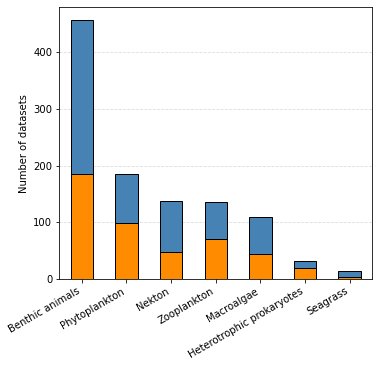

                           Before 2015  After 2015  Total
name                                                     
Benthic animals                  186.0       271.0  457.0
Phytoplankton                     98.0        87.0  185.0
Nekton                            47.0        91.0  138.0
Zooplankton                       70.0        66.0  136.0
Macroalgae                        44.0        66.0  110.0
Heterotrophic prokaryotes         20.0        11.0   31.0
Seagrass                           3.0        11.0   14.0


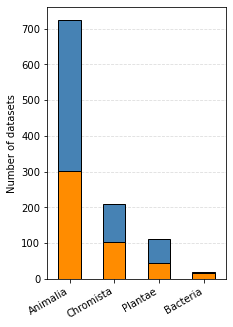

           Before 2015  After 2015  Total
name                                     
Animalia         301.0       424.0  725.0
Chromista        103.0       105.0  208.0
Plantae           44.0        68.0  112.0
Bacteria          15.0         4.0   19.0


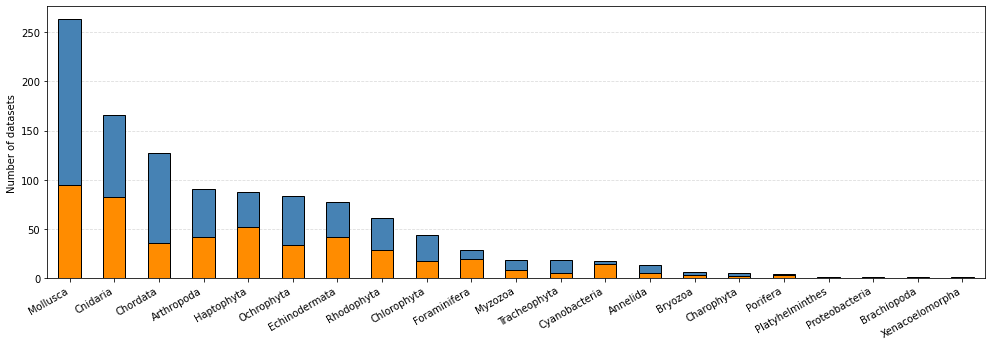

                 Before 2015  After 2015  Total
name                                           
Mollusca                95.0       168.0  263.0
Cnidaria                82.0        84.0  166.0
Chordata                36.0        91.0  127.0
Arthropoda              42.0        49.0   91.0
Haptophyta              52.0        36.0   88.0
Ochrophyta              34.0        49.0   83.0
Echinodermata           42.0        35.0   77.0
Rhodophyta              29.0        32.0   61.0
Chlorophyta             17.0        27.0   44.0
Foraminifera            19.0        10.0   29.0
Myzozoa                  8.0        10.0   18.0
Tracheophyta             5.0        13.0   18.0
Cyanobacteria           14.0         3.0   17.0
Annelida                 5.0         8.0   13.0
Bryozoa                  3.0         3.0    6.0
Charophyta               2.0         3.0    5.0
Porifera                 3.0         1.0    4.0
Platyhelminthes          0.0         1.0    1.0
Proteobacteria           0.0         1.0

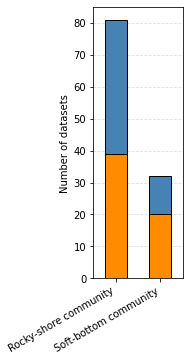

                       Before 2015  After 2015  Total
name                                                 
Rocky-shore community         39.0        42.0   81.0
Soft-bottom community         20.0        12.0   32.0


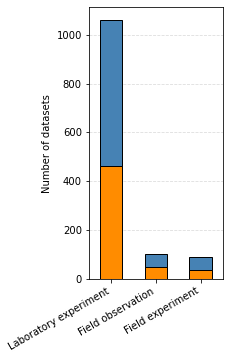

                       Before 2015  After 2015   Total
name                                                  
Laboratory experiment        461.0       599.0  1060.0
Field observation             47.0        57.0   104.0
Field experiment              36.0        52.0    88.0


In [52]:
year = 2015

# All categories except
categories = df.columns
categories = categories.drop(['_id', 'citation_date', 'keyword', 'Targeted species'])

for category in categories :
#for category in ['Geographical location'] :

    dhisto = pd.DataFrame()
    
    listKeywords = dictCategory[category]

    for k in listKeywords:
        s_total = df[df[category].apply(lambda x: bool(set(x) & set([k])))]
        s_period1 = s_total[s_total['citation_date'].between('1950-01-01', str(year-1)+'-12-31')]
        s_period2 = s_total[s_total['citation_date'].between(str(year)+'-01-01', '2030-12-31')]
    
        dhisto = dhisto.append({ 'name': k, 
                             'Before ' + str(year): len(s_period1), 
                             'After ' + str(year):  len(s_period2),
                             'Total':  len(s_total)}, 
                           ignore_index=True)

    dhisto.set_index('name', inplace=True)
    dhisto.sort_values(by='Total', inplace=True, ascending=False)
    
    dhistoFiltered = dhisto[dhisto['Total'] != 0]
    
    ax = dhistoFiltered.plot.bar(y=['Before ' + str(year), 'After ' + str(year)], 
                                 figsize=[0.8*len(dhistoFiltered),5], width=0.5, 
                                 color=["darkorange", "steelblue"],
                                 stacked=True, zorder=3, 
                                 linestyle='-', edgecolor="black",
                                 xlabel="", ylabel="Number of datasets")
    ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
    ax.get_legend().remove()
    plt.xticks(rotation=30, horizontalalignment='right')
    plt.savefig(category.replace(' ', '_') + '.png', 
                facecolor="white", transparent=False, bbox_inches="tight")
    plt.show()
    
    print(dhistoFiltered)